# Analyse, Datenauswertung und Visualisierung


In [ ]:
from google.colab import drive
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Projekt_Mobilisierung/Data/final_df_pm.csv'
final_df = pd.read_csv(file_path)

## Deskriptive Statistik

### Beiträge

In [ ]:
party_post_counts = final_df.groupby('party').size().reset_index(name='post_count')
print(party_post_counts)

media_counts = final_df.groupby('party')['num_media'].sum().reset_index(name='total_media')

print(media_counts)

    party  post_count
0     AFD        3033
1     CSU       15502
2     FDP        3516
3      FW        7520
4  GRUENE        7968
5   LINKE        1757
6     SPD        7601
    party  total_media
0     AFD         3808
1     CSU        41353
2     FDP         6643
3      FW        16480
4  GRUENE        16346
5   LINKE         3078
6     SPD        18876


### Interaktionen

Likes

In [ ]:
import pandas as pd

total_likes_per_party = final_df.groupby('party')['likes'].sum().reset_index(name='total_likes')

average_likes_per_post = final_df.groupby('party')['likes'].mean().reset_index(name='average_likes_per_post')

total_likes = final_df['likes'].sum()
total_likes_df = pd.DataFrame([{'party': 'Gesamt', 'likes': total_likes}])

likes_df = pd.concat([total_likes_per_party, total_likes_df], ignore_index=True)

print(likes_df)
print(average_likes_per_post)

    party  total_likes       likes
0     AFD     380567.0         NaN
1     CSU    8105628.0         NaN
2     FDP     352158.0         NaN
3      FW     707915.0         NaN
4  GRUENE    2438228.0         NaN
5   LINKE      82736.0         NaN
6     SPD     385936.0         NaN
7  Gesamt          NaN  12453168.0
    party  average_likes_per_post
0     AFD              125.475437
1     CSU              522.876274
2     FDP              100.158703
3      FW               94.137633
4  GRUENE              306.002510
5   LINKE               47.089357
6     SPD               50.774372


Kommentare

In [ ]:
import pandas as pd

total_comments_per_party = final_df.groupby('party')['comments'].sum().reset_index(name='total_comments')

average_comments_per_post = final_df.groupby('party')['comments'].mean().reset_index(name='average_comments_per_post')

total_comments = final_df['comments'].sum()
total_comments_df = pd.DataFrame([{'party': 'Gesamt', 'comments': total_comments}])

comments_df = pd.concat([total_comments_per_party, total_comments_df], ignore_index=True)

print(comments_df)
print(average_comments_per_post)

    party  total_comments  comments
0     AFD         22314.0       NaN
1     CSU        252630.0       NaN
2     FDP         21792.0       NaN
3      FW         28999.0       NaN
4  GRUENE         87874.0       NaN
5   LINKE          5333.0       NaN
6     SPD         16147.0       NaN
7  Gesamt             NaN  435089.0
    party  average_comments_per_post
0     AFD                   7.357072
1     CSU                  16.296607
2     FDP                   6.197952
3      FW                   3.856250
4  GRUENE                  11.028363
5   LINKE                   3.035287
6     SPD                   2.124326


## Hashtag-Analyse

In [ ]:
import pandas as pd
from collections import Counter

all_hashtags = [tag.lower() for tag in ','.join(final_df['hashtags'].dropna()).split(',')]

hashtags_counter = Counter(all_hashtags)

top_n_hashtags = hashtags_counter.most_common(20)
print(top_n_hashtags)

[('bayern', 8661), ('csu', 3272), ('freiewähler', 2426), ('politik', 2359), ('teambayern', 2228), ('landtagswahl', 2036), ('ltw23', 1740), ('landtag', 1714), ('landtagswahl2023', 1616), ('heimat', 1605), ('mitdir', 1563), ('münchen', 1458), ('ltw2023', 1364), ('augsburg', 1307), ('afd', 1166), ('sozialepolitikfürdich', 1147), ('fdp', 1092), ('gruene', 1074), ('anpackenfürbayern', 1068), ('spd', 1048)]


In [ ]:
hashtags_counter

Counter({'teambayern': 2228,
         'ltw23': 1740,
         'mitdir': 1563,
         'allestimmengrün': 216,
         'neuburg': 37,
         'neuburganderdonau': 104,
         'neuburgfitfürdiezukunft': 1,
         'ltw2023bayern': 71,
         'grueneenergie': 4,
         'gruenebayern': 245,
         'landderbayern': 76,
         'bayern': 8661,
         'wahlkampf': 664,
         'ingolstadt': 483,
         'bundesradlers': 2,
         'imeinsatzfüreuch': 13,
         'bundesradler': 6,
         'schrobenhausen': 28,
         'energiewende': 513,
         'fairelöhne': 27,
         'gewerkschaft': 52,
         'heizgesetz': 21,
         'fakten': 55,
         'geg': 86,
         'lisafürsklima': 3,
         'bayerischesenergiebündel': 2,
         'lisabadum': 7,
         'marinaabstreiter': 1,
         'volksfest': 219,
         'bierzelt': 63,
         'townhall': 12,
         'familie': 298,
         'familiennachmittag': 3,
         'volksfeste': 7,
         'grün': 106,
     

In [ ]:
import pandas as pd
from collections import Counter

all_hashtags = ','.join(final_df['hashtags'].dropna()).split(',')

hashtags_counter = Counter(all_hashtags)

hashtags_df = pd.DataFrame({'Hashtag': list(hashtags_counter.keys()),
                            'Häufigkeit': list(hashtags_counter.values())})

hashtags_df.sort_values(by='Häufigkeit', ascending=False, inplace=True)
hashtags_df.reset_index(drop=True, inplace=True)
hashtags_df.index += 1
hashtags_df.index.name = 'Rang'

df = hashtags_df.head(75)
df

,Hashtag,Häufigkeit
Rang,,
1,bayern,5766
2,Bayern,2893
3,csu,2449
4,politik,1716
5,ltw23,1471
...,...,...
71,augsburgcity,330
72,schwandorf,324
73,danke,323


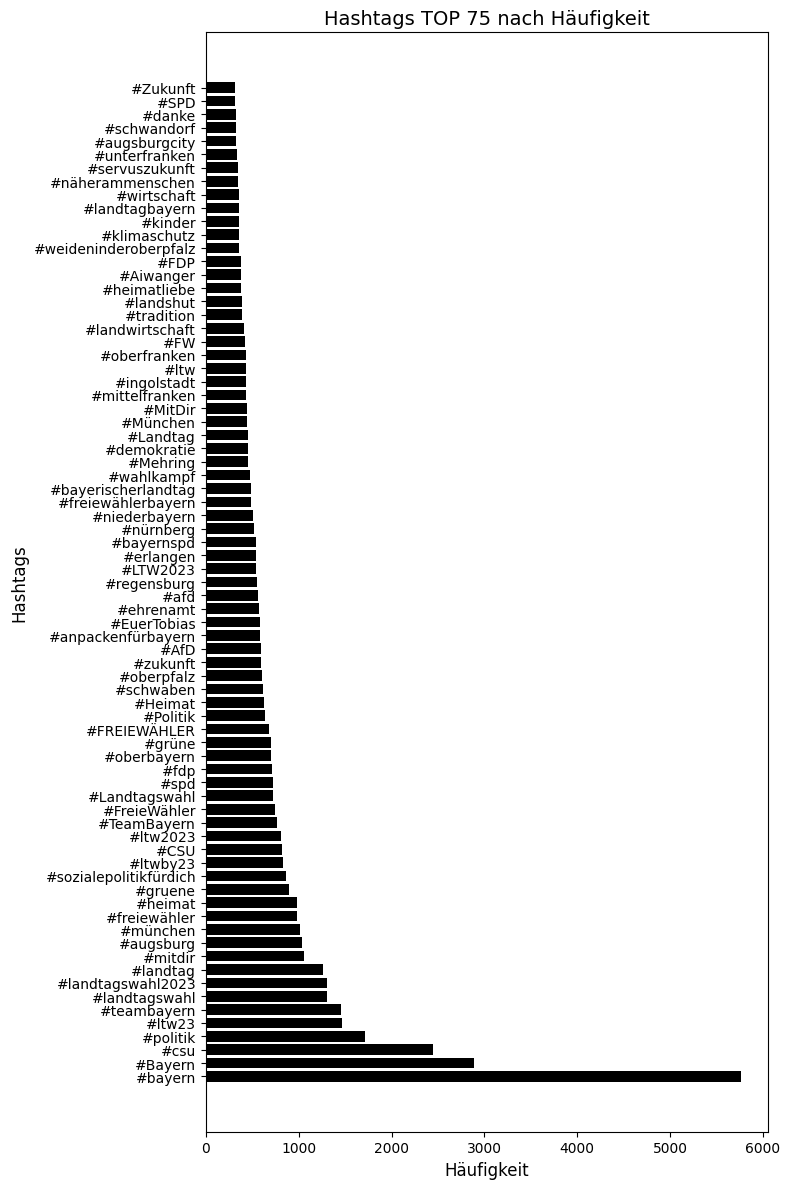

In [ ]:
top_75_hashtags = df['Hashtag'][:75]
top_75_häufigkeiten = df['Häufigkeit'][:75]

plt.figure(figsize=(8, 12))
bars = plt.barh(top_75_hashtags, top_75_häufigkeiten, color='black')

plt.xlabel('Häufigkeit', fontsize=12)
plt.ylabel('Hashtags', fontsize=12)
plt.title('Hashtags TOP 75 nach Häufigkeit', fontsize=14)

plt.yticks(range(len(top_75_hashtags)), ['#' + tag for tag in top_75_hashtags], fontsize=10)

plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
len(hashtags_df)

43863

In [ ]:
gesamtsumme = df['Häufigkeit'].sum()

print("Gesamtsumme der Häufigkeiten:", gesamtsumme)

Gesamtsumme der Häufigkeiten: 56421


In [ ]:
hashtags_df.to_csv('/content/drive/MyDrive/Projekt_Mobilisierung/Output/hashtags_df.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projekt_Mobilisierung/Output/des_stat.csv', delimiter=';')

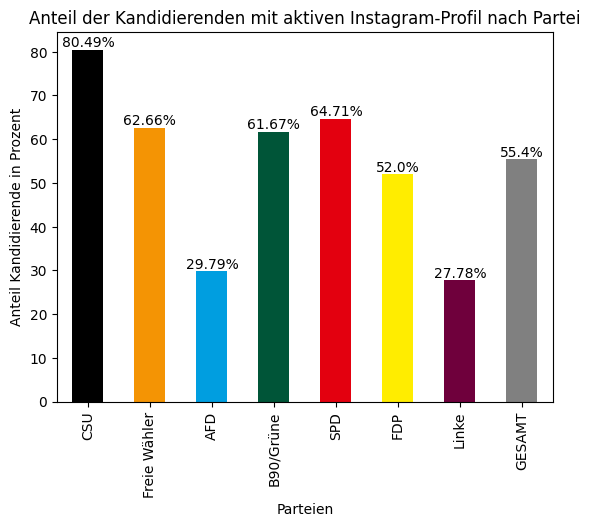

In [ ]:
import matplotlib.pyplot as plt

custom_colors = ['black', '#f49404', '#009EE0', '#005538', '#E3000F', '#ffed00', '#6f003c','grey']

df['Acc aktiv rel'] *= 100

ax = df.plot.bar(x='Partei', y='Acc aktiv rel', color=custom_colors, legend=False)

plt.xlabel('Parteien')
plt.ylabel('Anteil Kandidierende in Prozent')
plt.title('Anteil der Kandidierenden mit aktiven Instagram-Profil nach Partei')

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)) + '%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

## Performance-Analyse

### Datamanagement

In [ ]:
files = ['/content/drive/MyDrive/Projekt_Mobilisierung/Data/class/class_1_final_df_pm.csv',
         '/content/drive/MyDrive/Projekt_Mobilisierung/Data/class/class_2_final_df_pm.csv',
         '/content/drive/MyDrive/Projekt_Mobilisierung/Data/class/class_3_final_df_pm.csv',
         '/content/drive/MyDrive/Projekt_Mobilisierung/Data/class/class_4_final_df_pm.csv']

df_list = [pd.read_csv(file) for file in files]
df = pd.concat(df_list, ignore_index=True)

df = df.rename(columns={'Negative Campainging': 'Negative Campaigning'})

df.to_csv('/content/drive/MyDrive/Projekt_Mobilisierung/Data/class/class_final_df_pm.csv', index=False)

In [ ]:
file_path = '/content/drive/MyDrive/Projekt_Mobilisierung/Data/class_final_df_pm.csv'
df = pd.read_csv(file_path)

In [ ]:
import numpy as np

df['interaction_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['interaction_rate'], inplace=True)

### Regression

In [ ]:
import statsmodels.api as sm

category_columns = ["Politischer Inhalt/Info", "Negative Campaigning", "Selbstpräsentation unpolitisch",
                    "Selbstpräsentation politisch", "Parteipräsentation unpolitisch",
                    "Parteipräsentation politisch", "Interaktion", "Neutrale Infos zur Stimmabgabe",
                    "Mitgliederinfo", "Fundraising", "Veranstaltungshinweis", "Wahlaufruf direkt", "Sonstiges"]

X = df[category_columns]
y = df['interaction_rate']

X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       interaction_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.648
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           6.93e-13
Time:                        06:35:16   Log-Likelihood:                 9157.5
No. Observations:               46711   AIC:                        -1.829e+04
Df Residuals:                   46697   BIC:                        -1.816e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Mittelwert-Analyse

In [ ]:
results = []

for category in category_columns:
    mean_interaction = df[df[category] == 1]['interaction_rate'].mean()
    results.append({
        'Category': category,
        'Mean Interaction Rate': mean_interaction
    })

mean_interaction_df = pd.DataFrame(results)

print("Durchschnittlicher Interaktionsratenmittelwert für jede Kategorie (nur wenn Kategorie = 1):")
print(mean_interaction_df)

Durchschnittlicher Interaktionsratenmittelwert für jede Kategorie (nur wenn Kategorie = 1):
                          Category  Mean Interaction Rate
0          Politischer Inhalt/Info               0.043677
1             Negative Campaigning               0.055466
2   Selbstpräsentation unpolitisch               0.050826
3     Selbstpräsentation politisch               0.040570
4   Parteipräsentation unpolitisch               0.045051
5     Parteipräsentation politisch               0.038353
6                      Interaktion               0.048730
7   Neutrale Infos zur Stimmabgabe               0.043449
8                   Mitgliederinfo               0.032257
9                      Fundraising               0.039905
10           Veranstaltungshinweis               0.037802
11               Wahlaufruf direkt               0.054882
12                       Sonstiges               0.051576


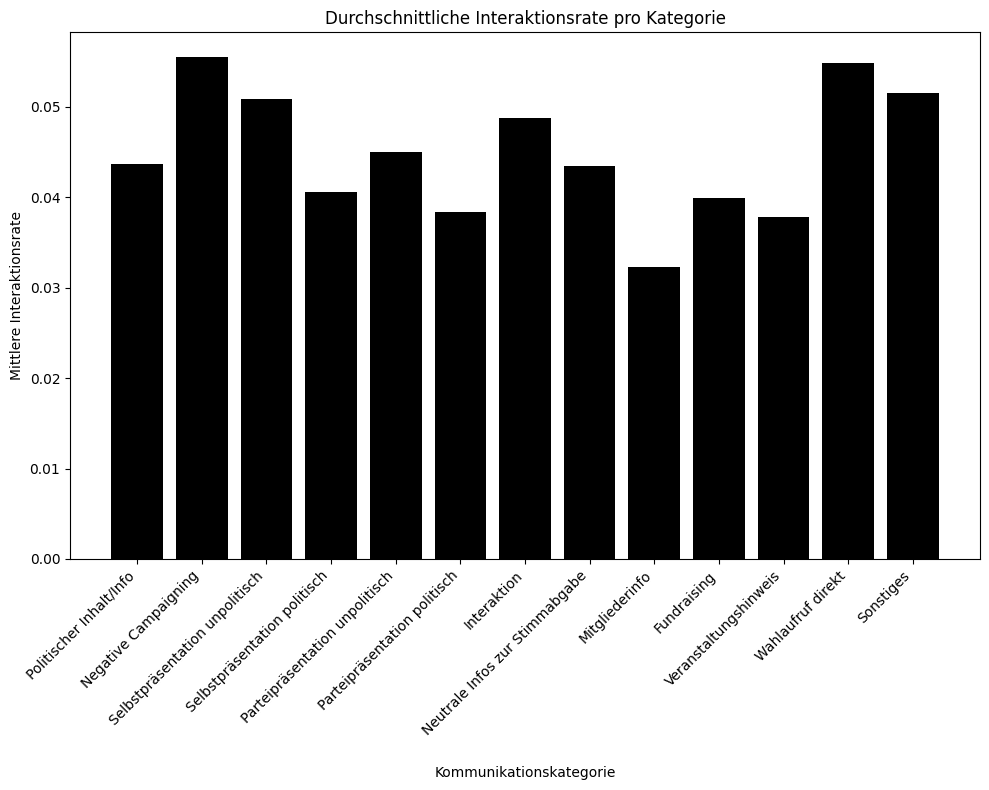

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.bar(mean_interaction_df['Category'], mean_interaction_df['Mean Interaction Rate'], color='black')
plt.xlabel('Kommunikationskategorie', labelpad=20)
plt.ylabel('Mittlere Interaktionsrate')
plt.title('Durchschnittliche Interaktionsrate pro Kategorie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from itertools import combinations
import numpy as np

def calculate_combination_means(df, category_columns):
    combi_means = []
    for r in range(1, len(category_columns) + 1):
        for combo in combinations(category_columns, r):
            df_subset = df.loc[df[list(combo)].sum(axis=1) == len(combo)]
            mean_interaction = df_subset['interaction_rate'].mean()
            combi_means.append((combo, mean_interaction))
    return combi_means

combi_means = calculate_combination_means(df, category_columns)

combi_means_sorted = sorted(combi_means, key=lambda x: x[1], reverse=True)

top_10_combinations = combi_means_sorted[:10]

print("\nTop 10 Kombinationen von Kategorien mit den höchsten Interaktionsratenmittelwerten:")
for combo, mean_interaction in top_10_combinations:
    print(f"Kombination: {combo}, Durchschnittliche Interaktionsrate: {mean_interaction}")


Top 10 Kombinationen von Kategorien mit den höchsten Interaktionsratenmittelwerten:
Kombination: ('Parteipräsentation unpolitisch', 'Parteipräsentation politisch', 'Veranstaltungshinweis', 'Wahlaufruf direkt'), Durchschnittliche Interaktionsrate: 321.86390777890557
Kombination: ('Parteipräsentation unpolitisch', 'Veranstaltungshinweis', 'Wahlaufruf direkt'), Durchschnittliche Interaktionsrate: 213.7631346744261
Kombination: ('Parteipräsentation unpolitisch', 'Parteipräsentation politisch', 'Wahlaufruf direkt'), Durchschnittliche Interaktionsrate: 169.1016653608671
Kombination: ('Politischer Inhalt/Info', 'Parteipräsentation unpolitisch', 'Parteipräsentation politisch', 'Veranstaltungshinweis', 'Wahlaufruf direkt'), Durchschnittliche Interaktionsrate: 163.48024761192735
Kombination: ('Politischer Inhalt/Info', 'Negative Campaigning', 'Neutrale Infos zur Stimmabgabe', 'Veranstaltungshinweis'), Durchschnittliche Interaktionsrate: 129.46255723925853
Kombination: ('Selbstpräsentation unpol

### Frequenzanalyse

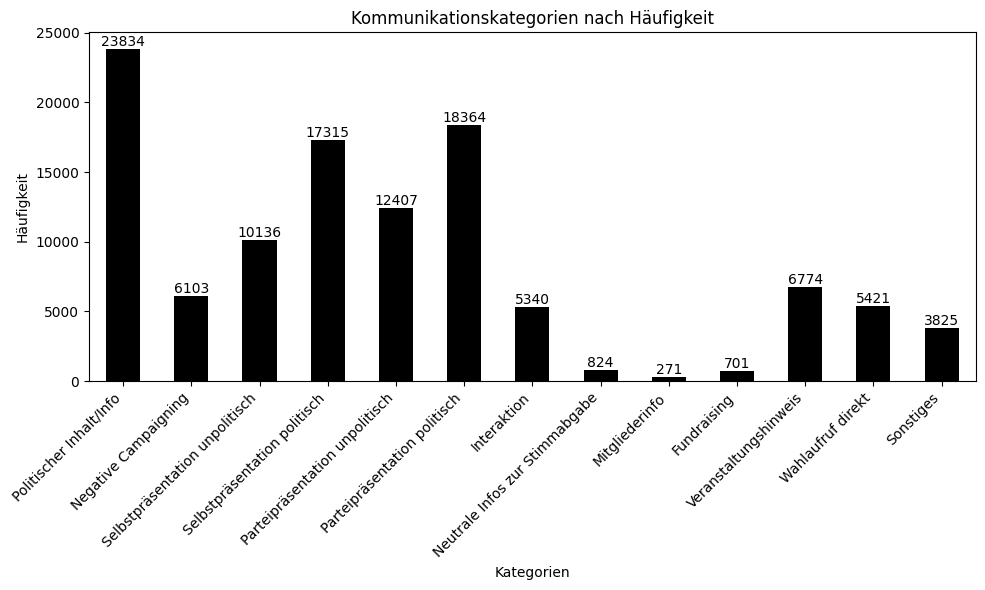

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

category_columns = ["Politischer Inhalt/Info", "Negative Campaigning", "Selbstpräsentation unpolitisch",
                    "Selbstpräsentation politisch", "Parteipräsentation unpolitisch",
                    "Parteipräsentation politisch", "Interaktion", "Neutrale Infos zur Stimmabgabe",
                    "Mitgliederinfo", "Fundraising", "Veranstaltungshinweis", "Wahlaufruf direkt", "Sonstiges"]

counts = df[category_columns].sum()

plt.figure(figsize=(10, 6))
ax = counts.plot(kind='bar', color='black')
plt.title('Kommunikationskategorien nach Häufigkeit')
plt.xlabel('Kategorien')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, value in enumerate(counts):
    ax.text(i, value + 1, str(value), ha='center', va='bottom')

plt.show()

Quellen:

Achmann-Denkler, M. (2024). michaelachmann/social-media-lab: DOI Release (v0.0.12). Zenodo. https://doi.org/10.5281/zenodo.10618621